In [16]:
!git clone -b personE-evaluation https://github.com/NGJIERU/WIE3007-GroupProject-Sem1-2025.git


Cloning into 'WIE3007-GroupProject-Sem1-2025'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 254 (delta 84), reused 56 (delta 45), pack-reused 137 (from 1)
Receiving objects: 100% (254/254), 4.22 MiB | 14.69 MiB/s, done.
Resolving deltas: 100% (141/141), done.


In [17]:
%cd /content/WIE3007-GroupProject-Sem1-2025

/content/WIE3007-GroupProject-Sem1-2025


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = pd.read_csv("data/features.csv")
y = pd.read_csv("data/target.csv").squeeze()

# Drop leakage if exists
if "days_since_last_purchase" in X.columns:
    X = X.drop(columns=["days_since_last_purchase"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

results = []

def add_result(model_name, accuracy, f1, roc_auc):
    results.append({
        "model": model_name,
        "accuracy": accuracy,
        "f1_score": f1,
        "roc_auc": roc_auc
    })
    print(f"✅ Added results for: {model_name}")

**Decision Tree**

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("Decision Tree", acc, f1, roc)

✅ Added results for: Decision Tree


**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

lr = LogisticRegression(
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("Logistic Regression", acc, f1, roc)


✅ Added results for: Logistic Regression


**Random Forest**

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("Random Forest", acc, f1, roc)

✅ Added results for: Random Forest


**XGB**

In [23]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

xgb_D = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_D.fit(X_train, y_train)

y_pred = xgb_D.predict(X_test)
y_prob = xgb_D.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("XGBoost", acc, f1, roc)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:22:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Added results for: XGBoost


**MLP**

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50, 25),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)
y_prob = mlp.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("MLP", acc, f1, roc)

✅ Added results for: MLP


**Result Comparison**

,model,accuracy,f1_score,roc_auc
0,Decision Tree,0.904167,0.862275,0.893315
1,Logistic Regression,0.941667,0.917647,0.965201
2,Random Forest,0.958333,0.942529,0.967415
3,XGBoost,0.950000,0.931818,0.964133
4,MLP,0.929167,0.901734,0.961767


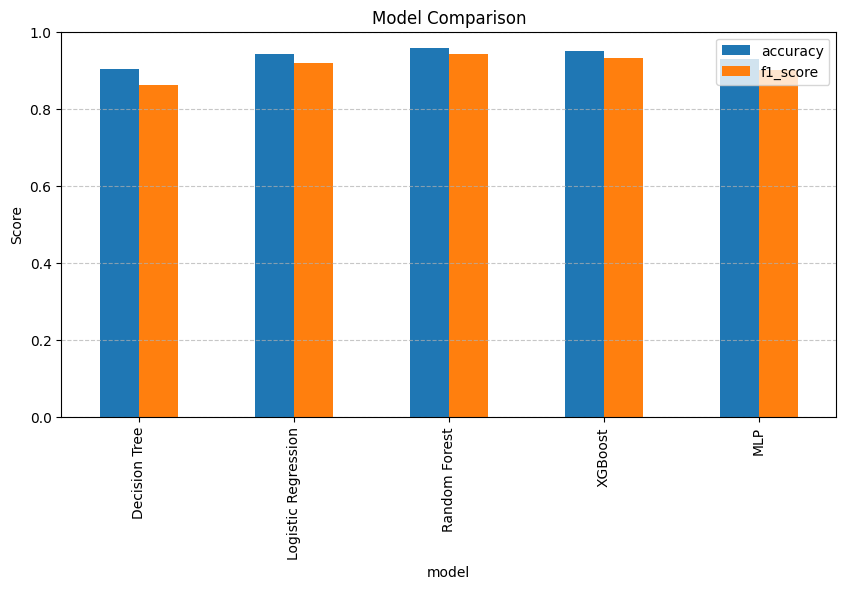

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.DataFrame(results)
display(results_df)

# Plot Accuracy & F1
results_df.set_index("model")[["accuracy", "f1_score"]].plot(kind="bar", figsize=(10,5))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Evaluation Summary & Interpretation**

The evaluation of the five models provides a clear understanding of their predictive performance on the dataset. All models were trained and tested on the same train/test split (random_state=42, stratified sampling) to ensure fair comparison. The metrics used for evaluation are Accuracy, F1-Score, and ROC-AUC.

1.Decision Tree (Baseline)

Interpretation: As the baseline model, the Decision Tree performs reasonably well. Its simpler structure makes it easy to interpret, but it does not capture complex patterns as effectively as ensemble or nonlinear models.

2.Logistic Regression

Interpretation: Logistic Regression, a linear model, performs strongly. It captures the overall trend in the data but may miss some nonlinear interactions. Its simplicity and interpretability make it a reliable benchmark.

3.Random Forest

Interpretation: Random Forest achieves the best overall performance. The ensemble of trees reduces overfitting and captures complex patterns, making it stable and robust across different splits. This model is highly recommended for predictive tasks on this dataset.

4.XGBoost

Interpretation: XGBoost shows slightly lower accuracy than Random Forest but still provides strong performance. Its gradient boosting approach effectively models complex relationships, making it a powerful alternative to Random Forest.

5.MLP (Neural Network)

Interpretation: The MLP captures nonlinear patterns in the data but slightly underperforms compared to tree-based models. Neural networks may require more tuning and scaling, but they provide flexibility in modeling complex relationships.

Overall Insight:

All models outperform random guessing, indicating that the engineered features carry meaningful predictive signal.

Tree-based ensemble methods (Random Forest and XGBoost) dominate in terms of accuracy and robustness.

Logistic Regression is a strong linear benchmark, while the Decision Tree provides a simple interpretable baseline.

MLP demonstrates the potential of neural networks, especially for capturing nonlinear patterns, but may require additional tuning to match tree-based performance.